In [1]:
# === Development Environment ===
"""
Python version:       3.7.13 
numpy version:        1.21.5
seqlogo version:      5.29.8
pandas version:       1.3.4
scikit-learn version: 1.0.2
scipy version:        1.7.3
matplotlib version: 3.5.1
seaborn version: 0.11.2
scipy version: 1.7.3
logomaker version: 0.8
"""

'\nPython version:       3.7.13 \nnumpy version:        1.21.5\nseqlogo version:      5.29.8\npandas version:       1.3.4\nscikit-learn version: 1.0.2\nscipy version:        1.7.3\nmatplotlib version: 3.5.1\nseaborn version: 0.11.2\nscipy version: 1.7.3\nlogomaker version: 0.8\n'

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import seqlogo
import logomaker
import pickle

In [3]:
training = pd.read_csv("../data/MHCflurry_training.csv", index_col=0)
mhc_df_filtered = pd.read_csv("../data/MHCflurry_filtered.csv", index_col=0) #run src/MHCflurry_data_prep.py

In [4]:
training

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
HLA-A*01:01,0.081315,0.162422,0.241059,0.035835,0.034292,0.050126,0.070092,0.324860,0.034812,0.179176,...,0.174626,0.221327,0.028810,0.027451,0.029126,0.023306,0.023021,0.029119,0.034830,0.368131
HLA-A*02:01,0.071104,0.307429,0.074598,0.086387,0.097113,0.078272,0.066282,0.218815,0.063017,0.316960,...,0.283464,0.066635,0.115659,0.042984,0.048289,0.044050,0.044625,0.046068,0.040506,0.204624
HLA-A*02:02,0.168891,0.126514,0.100034,0.100743,0.067922,0.094194,0.063096,0.278605,0.054757,0.316398,...,0.280329,0.093193,0.117159,0.030839,0.036117,0.042976,0.039837,0.027649,0.041866,0.216500
HLA-A*02:03,0.083138,0.201355,0.093360,0.068630,0.204836,0.071905,0.039563,0.237213,0.060854,0.289886,...,0.253302,0.081340,0.110051,0.047964,0.030990,0.034878,0.073039,0.025032,0.051098,0.246501
HLA-A*02:04,0.063085,0.221893,0.120331,0.060300,0.146161,0.091679,0.055805,0.240747,0.060805,0.232372,...,0.234018,0.102723,0.096211,0.032344,0.051654,0.031558,0.084505,0.063438,0.036452,0.217723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HLA-C*14:02,0.080107,0.343461,0.053702,0.045214,0.114524,0.039027,0.065993,0.257971,0.068029,0.354785,...,0.273631,0.087094,0.090138,0.065766,0.030765,0.037644,0.053018,0.050317,0.053606,0.176029
HLA-C*14:03,0.093926,0.324020,0.055399,0.074286,0.132611,0.033844,0.072139,0.213774,0.074042,0.350829,...,0.306184,0.088261,0.101596,0.062464,0.021371,0.031482,0.040927,0.056179,0.049893,0.164539
HLA-C*15:02,0.058991,0.143934,0.141061,0.058572,0.119255,0.191503,0.049054,0.237629,0.092705,0.191240,...,0.166051,0.064102,0.092033,0.045810,0.049605,0.023875,0.034028,0.048474,0.074392,0.267488
HLA-C*16:01,0.090457,0.258861,0.063814,0.052830,0.130448,0.060502,0.090346,0.252741,0.084620,0.282253,...,0.182713,0.062260,0.085823,0.055813,0.042407,0.039597,0.060107,0.052649,0.064104,0.286654


/home/shepherd/anaconda3/envs/xgboost_env2/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  app.launch_new_instance()


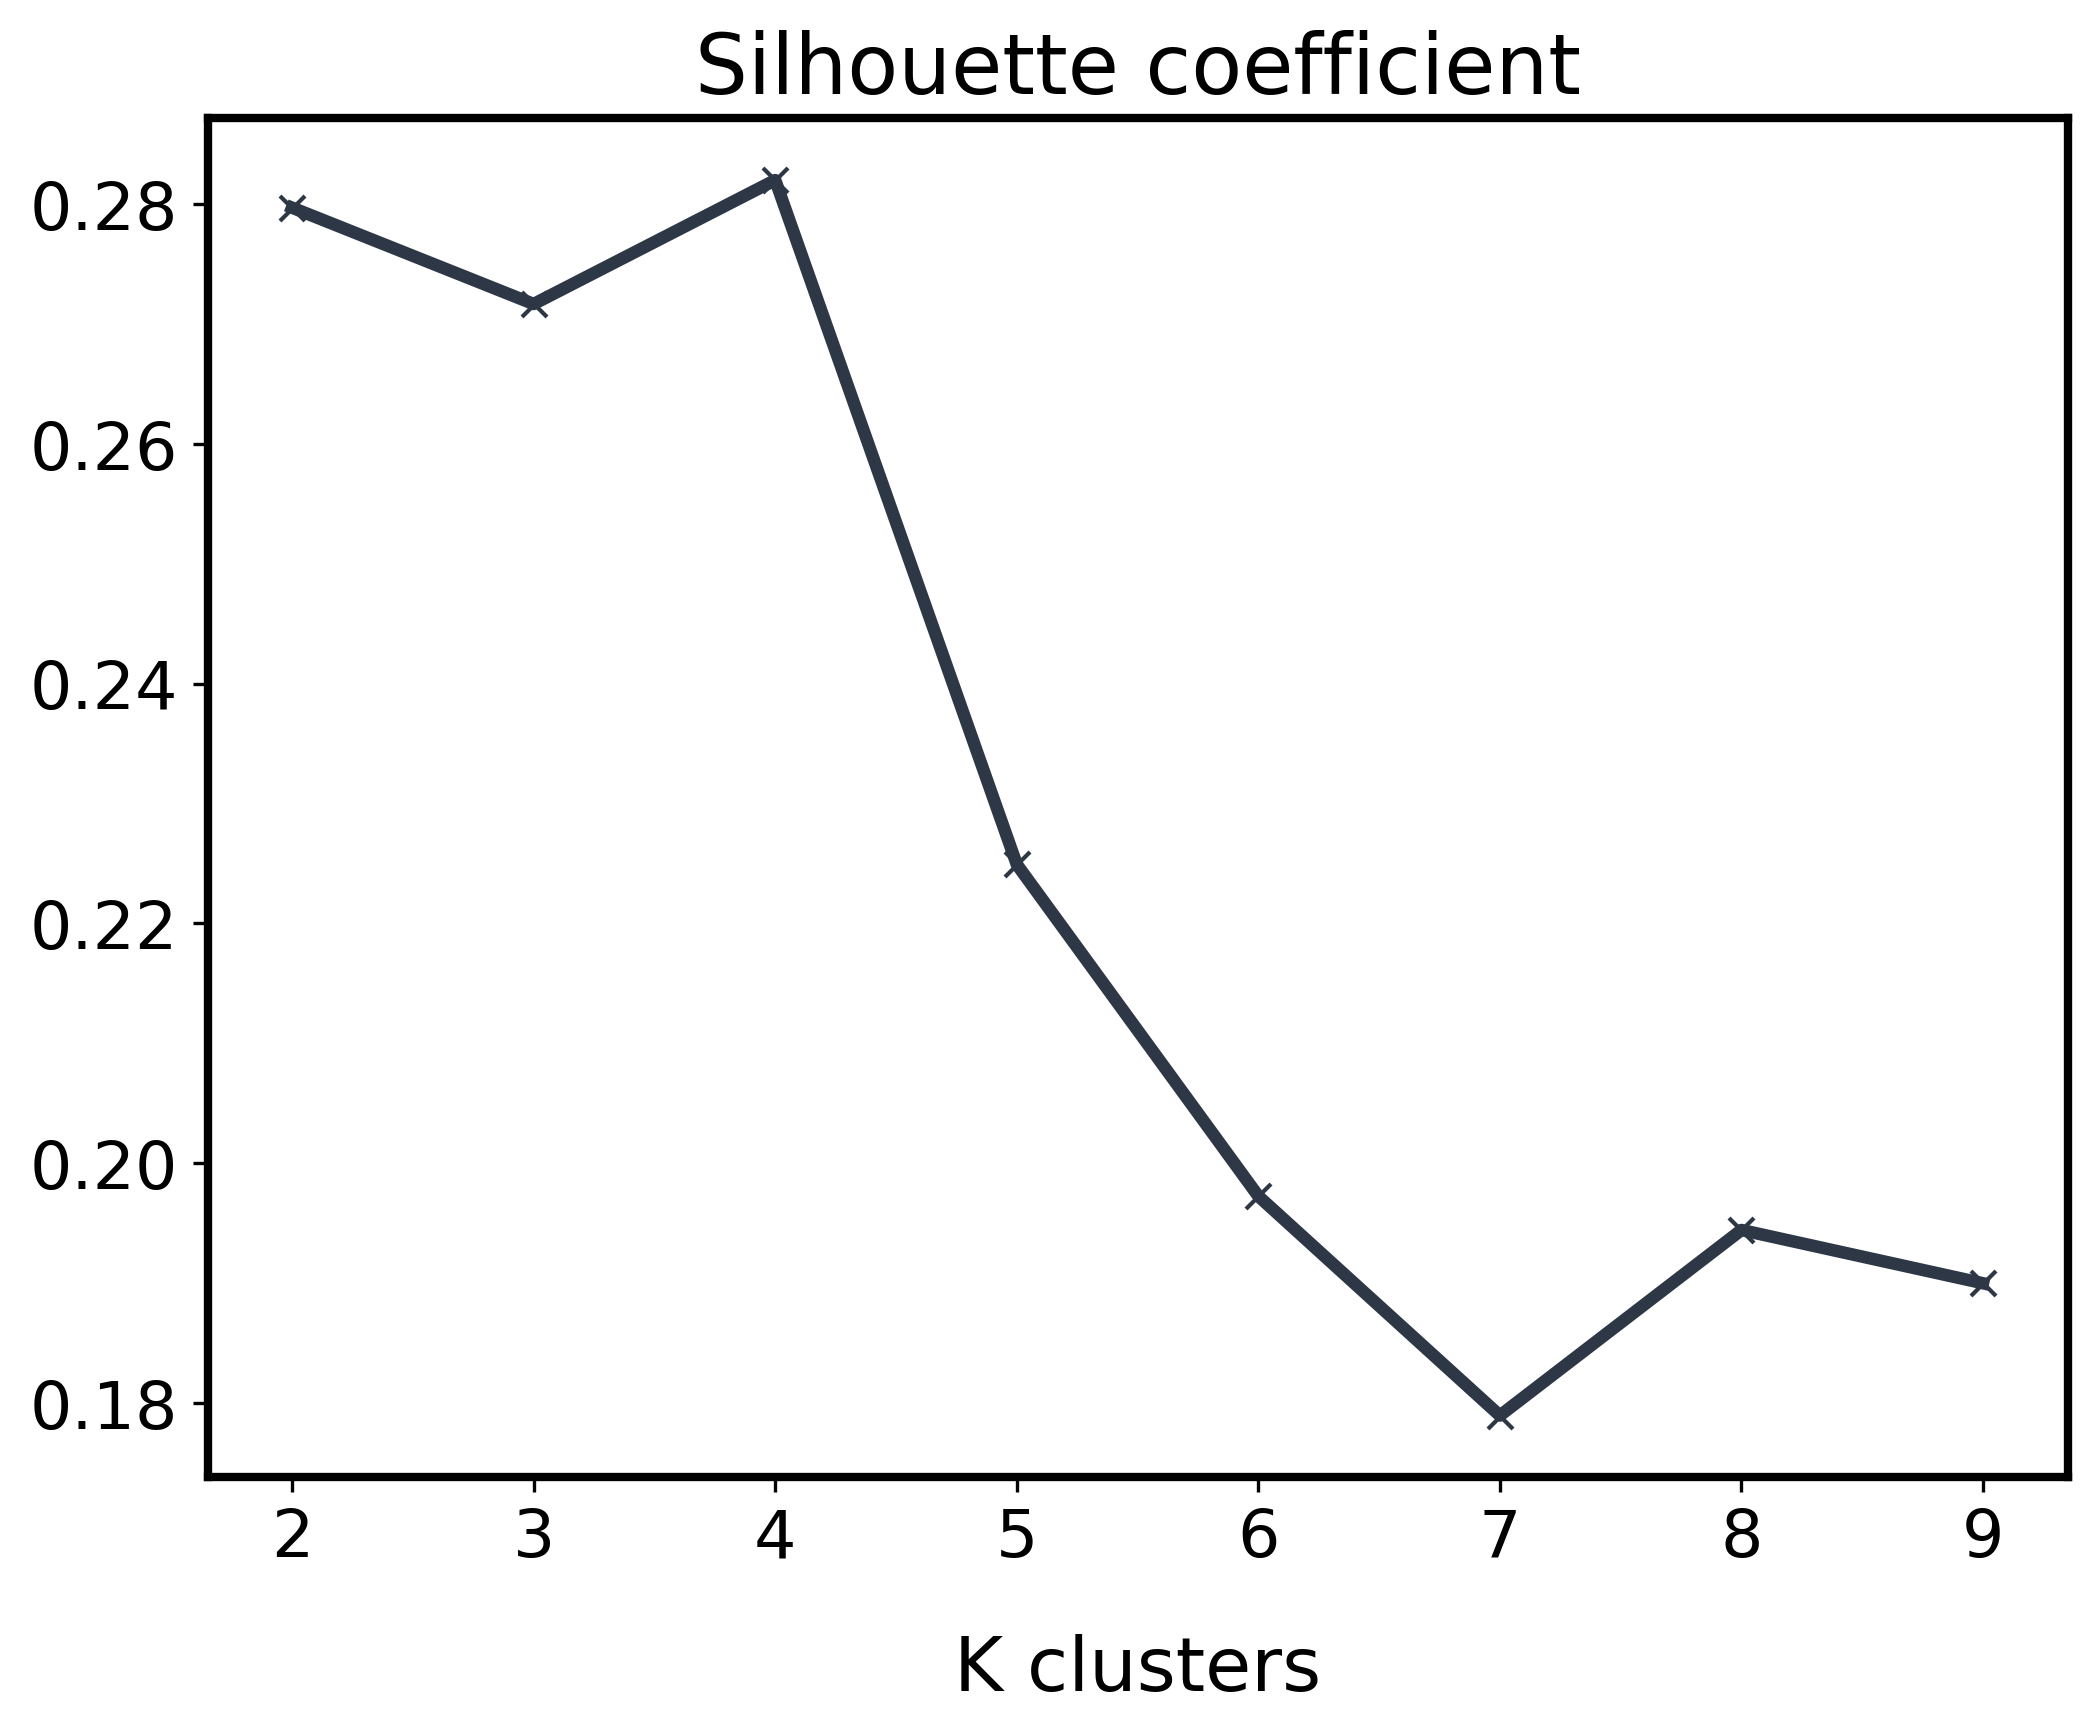

/home/shepherd/anaconda3/envs/xgboost_env2/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.


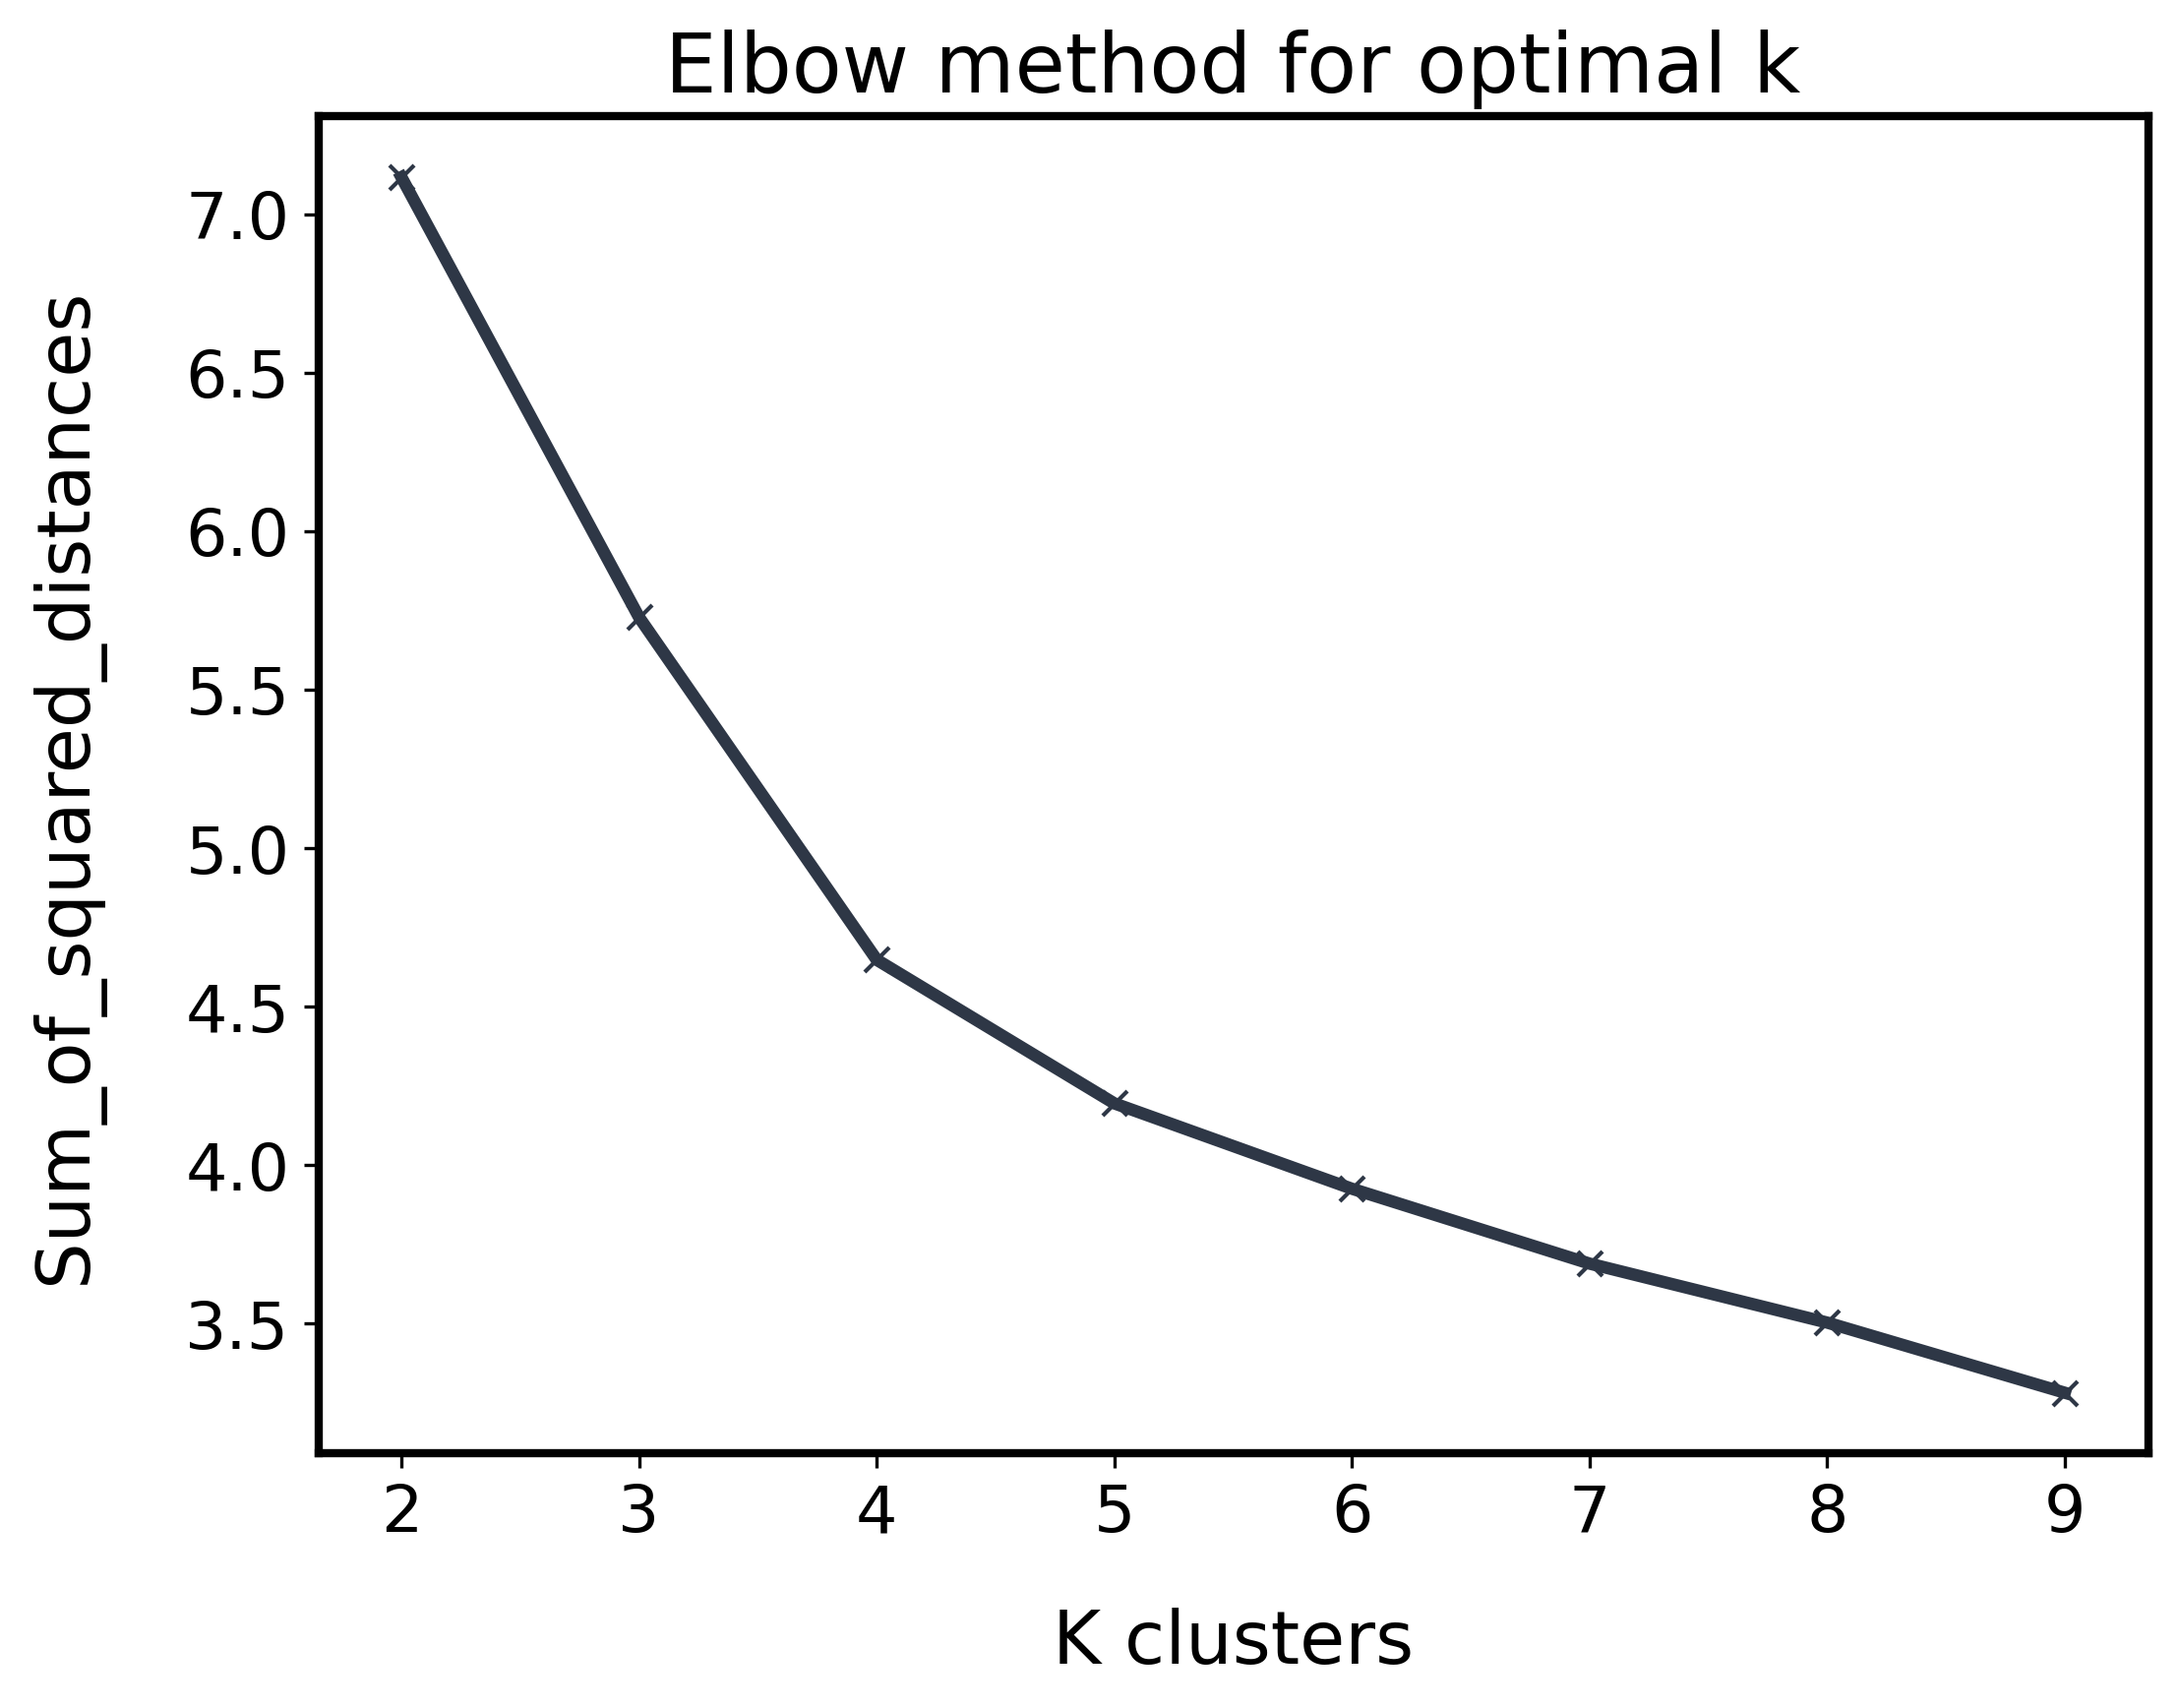

In [5]:
K = range(2,10)
plt.figure(figsize=(8, 6), dpi=300)
plt.rcParams['font.weight'] = 400
plt.rcParams['text.color'] = 'black'          # general text
plt.rcParams['axes.labelcolor'] = 'black'     # x/y axis labels
plt.rcParams['xtick.color'] = 'black'         # x-tick labels
plt.rcParams['ytick.color'] = 'black'         # y-tick labels
plt.rcParams['axes.titlecolor'] = 'black'     # title color
plt.rcParams['legend.labelcolor'] = 'black'   # legend text
plt.rcParams['pdf.fonttype'] = 42

silhouette_avg = []
for k in K:
    kmeans_fit = KMeans(n_clusters = k).fit(training)
    silhouette_avg.append(silhouette_score(training, kmeans_fit.labels_))
plt.plot(K, silhouette_avg, 'bx-', linewidth=3, color="#2E3746")
plt.xlabel('K clusters',fontweight=400, fontsize=18, labelpad=15)
plt.title('Silhouette coefficient', fontweight=400, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)
plt.savefig('figures/silhouette.png', dpi=300, transparent=True, bbox_inches='tight')
plt.savefig('figures/pdf/silhouette.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

sil_lst = []
for i in range(len(silhouette_avg)):
    if i + 1 >= len(silhouette_avg):
        break
    sil_lst.append(silhouette_avg[i]-silhouette_avg[i+1])

Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(training)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8, 6), dpi=300)
plt.rcParams['font.weight'] = 400
plt.plot(K, Sum_of_squared_distances, 'bx-', linewidth=3, color="#2E3746")
plt.xlabel('K clusters',fontweight=400, fontsize=18, labelpad=15)
plt.ylabel('Sum_of_squared_distances',fontweight=400, fontsize=18, labelpad=20)
plt.title('Elbow method for optimal k',fontweight=400, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)
plt.savefig('figures/elbow_plot.png', dpi=300, transparent=True, bbox_inches='tight')
plt.savefig('figures/pdf/elbow_plot.pdf', dpi=300, transparent=True, format = 'pdf',bbox_inches='tight')
plt.show()

In [6]:
pca_df = pd.read_csv("../data/tier1_hla_pca.csv", index_col = 0)

In [7]:
def kmeans_pred(i, df):
    import pickle
    from sklearn.cluster import KMeans
    from scipy.spatial.distance import euclidean
    import matplotlib.pyplot as plt
    plt.rcParams['pdf.fonttype'] = 42
    # Load trained model
    model_filename = f'../models/kmeans_HLA{i}cluster.pkl'
    with open(model_filename, 'rb') as file:
        model = pickle.load(file)

    # Predict clusters
    clusters = model.predict(df)
    unique_elements, counts_elements = np.unique(clusters, return_counts=True)
    print("Count of each cluster:")
    print(np.array([unique_elements, counts_elements]))

    # Find closest point to each cluster center
    tr_array = training.to_numpy()
    for iclust in range(model.n_clusters):
        cluster_pts_indices = np.where(model.labels_ == iclust)[0]
        min_idx = np.argmin([euclidean(tr_array[idx], model.cluster_centers_[iclust]) for idx in cluster_pts_indices])
        print(f'Closest index to cluster {iclust} center:', training.index[cluster_pts_indices[min_idx]])

    # Define color map
    LABEL_COLOR_MAP = {
        0: '#7E9AB2', 1: '#EDC264', 2: '#F28482', 3: '#92BEAA',
        4: '#F5CAC3', 5: '#B8B8B8'
    }
    label_color = [LABEL_COLOR_MAP[l] for l in clusters]

    # Plot
    plt.figure(figsize=(9, 6.5))
    plt.xlabel('PC 1', fontsize=18, fontweight='regular', labelpad=20)
    plt.ylabel('PC 2', fontsize=18, fontweight='regular', labelpad=15)
    plt.title(f'K-Means clustering (K={i})', fontsize=20, fontweight='regular', pad=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.rcParams["axes.linewidth"] = 2
    #plt.xlim(-0.6, 0.6)
    #plt.ylim(-0.4, 0.6)
    scatter = plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=label_color,
                          alpha=1, edgecolors='#747474', s=80)

    # Add legend
    legend_labels = {k: f"Cluster {k+1}" for k in unique_elements}
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=LABEL_COLOR_MAP[k], label=legend_labels[k],
                          markersize=10) for k in unique_elements]
    plt.legend(handles=handles, title='Clusters', fontsize=14,
               title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

    # Save figure
    filename = f"figures/c{i}clusters.png"
    plt.tight_layout()
    plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
    filename = f"figures/pdf/c{i}clusters.pdf"
    plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

    return clusters

Count of each cluster:
[[ 0  1  2]
 [41 43 23]]
Closest index to cluster 0 center: HLA-C*12:02
Closest index to cluster 1 center: HLA-B*07:02
Closest index to cluster 2 center: HLA-A*68:01


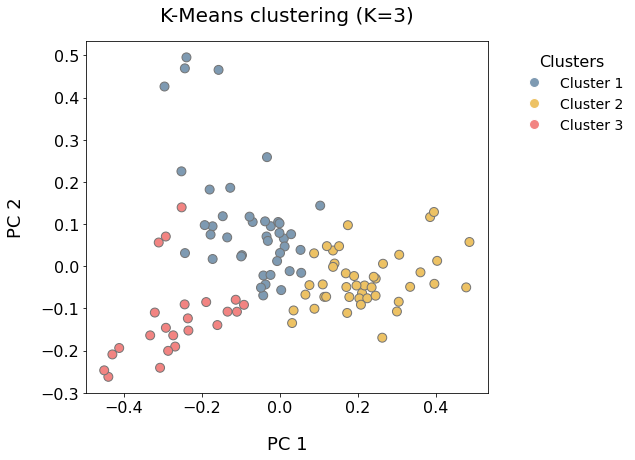

,HLA,cluster
0,HLA-A*01:01,2
1,HLA-A*02:01,1
2,HLA-A*02:02,0
3,HLA-A*02:03,0
4,HLA-A*02:04,0
...,...,...
102,HLA-C*14:02,1
103,HLA-C*14:03,1
104,HLA-C*15:02,0
105,HLA-C*16:01,0


In [8]:
final_pred_c3 = kmeans_pred(i=3, df=training)
final_df_c3 = pd.DataFrame({"HLA":training.index,"cluster": final_pred_c3})
final_df_c3.to_csv("../results/clustering_resC3.csv")
#final_df[final_df["cluster"] == 2]
final_df_c3

Count of each cluster:
[[ 0  1  2  3]
 [38 43 18  8]]
Closest index to cluster 0 center: HLA-C*12:02
Closest index to cluster 1 center: HLA-B*07:02
Closest index to cluster 2 center: HLA-A*03:01
Closest index to cluster 3 center: HLA-C*05:01


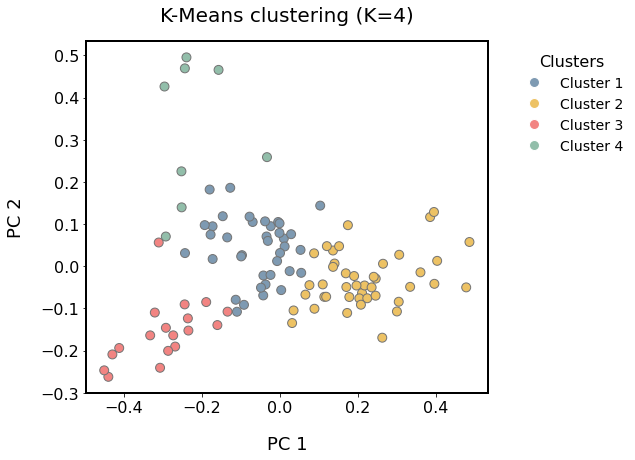

,HLA,cluster
0,HLA-A*01:01,3
1,HLA-A*02:01,1
2,HLA-A*02:02,0
3,HLA-A*02:03,0
4,HLA-A*02:04,0
...,...,...
102,HLA-C*14:02,1
103,HLA-C*14:03,1
104,HLA-C*15:02,0
105,HLA-C*16:01,0


In [9]:
final_pred_c4 = kmeans_pred(i=4, df=training)
final_df_c4 = pd.DataFrame({"HLA":training.index,"cluster": final_pred_c4})
final_df_c4.to_csv("../results/clustering_resC4.csv")
final_df_c4

Count of each cluster:
[[ 0  1  2  3  4]
 [30 17 23  7 30]]
Closest index to cluster 0 center: HLA-B*40:06
Closest index to cluster 1 center: HLA-A*68:01
Closest index to cluster 2 center: HLA-C*12:02
Closest index to cluster 3 center: HLA-C*08:02
Closest index to cluster 4 center: HLA-B*57:03


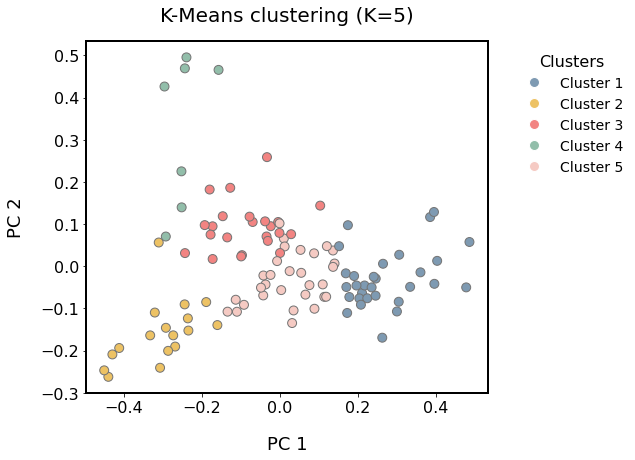

,HLA,cluster
0,HLA-A*01:01,3
1,HLA-A*02:01,4
2,HLA-A*02:02,4
3,HLA-A*02:03,2
4,HLA-A*02:04,2
...,...,...
102,HLA-C*14:02,0
103,HLA-C*14:03,0
104,HLA-C*15:02,2
105,HLA-C*16:01,4


In [10]:
final_pred_c5 = kmeans_pred(i=5, df=training)
final_df_c5 = pd.DataFrame({"HLA":training.index,"cluster": final_pred_c5})
final_df_c5.to_csv("../results/clustering_resC5.csv")
#final_df[final_df["cluster"] == 2]
final_df_c5

Count of each cluster:
[[ 0  1  2  3  4  5]
 [15 25 17 30  7 13]]
Closest index to cluster 0 center: HLA-A*68:01
Closest index to cluster 1 center: HLA-C*12:02
Closest index to cluster 2 center: HLA-B*44:03
Closest index to cluster 3 center: HLA-B*35:03
Closest index to cluster 4 center: HLA-C*08:02
Closest index to cluster 5 center: HLA-B*58:01


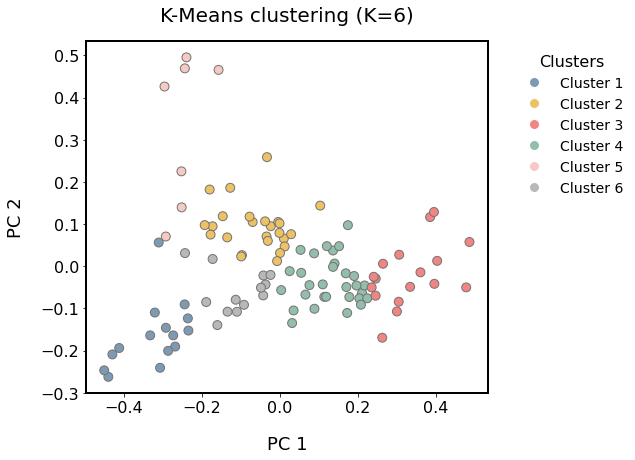

,HLA,cluster
0,HLA-A*01:01,4
1,HLA-A*02:01,3
2,HLA-A*02:02,1
3,HLA-A*02:03,1
4,HLA-A*02:04,1
...,...,...
102,HLA-C*14:02,3
103,HLA-C*14:03,3
104,HLA-C*15:02,1
105,HLA-C*16:01,1


In [11]:
final_pred_c6 = kmeans_pred(i=6, df=training)
final_df_c6 = pd.DataFrame({"HLA":training.index,"cluster": final_pred_c6})
final_df_c6.to_csv("../results/clustering_resC6.csv")
#final_df[final_df["cluster"] == 2]
final_df_c6

In [12]:
def gmm_pred(i, df):
    import pickle
    import numpy as np
    import pandas as pd
    from scipy.spatial.distance import euclidean
    from sklearn.mixture import GaussianMixture
    import matplotlib.pyplot as plt
    plt.rcParams['pdf.fonttype'] = 42
    # Load trained GMM model
    model_filename = f'../models/gmm_HLA{i}cluster.pkl'
    with open(model_filename, 'rb') as file:
        model = pickle.load(file)

    # Predict clusters
    clusters = model.predict(df)
    unique_elements, counts_elements = np.unique(clusters, return_counts=True)
    print("Count of each cluster:")
    print(np.array([unique_elements, counts_elements]))

    # Find closest point to each cluster center
    tr_array = df.to_numpy()
    for iclust in range(model.n_components):
        cluster_pts_indices = np.where(clusters == iclust)[0]
        min_idx = np.argmin([euclidean(tr_array[idx], model.means_[iclust]) for idx in cluster_pts_indices])
        print(f'Closest index to cluster {iclust} center:', df.index[cluster_pts_indices[min_idx]])

    # Define color map
    LABEL_COLOR_MAP = {
        0: '#7E9AB2', 1: '#EDC264', 2: '#F28482', 3: '#92BEAA',
        4: '#F5CAC3', 5: '#B8B8B8'
    }
    label_color = [LABEL_COLOR_MAP[l] for l in clusters]

    plt.figure(figsize=(9, 6.5))
    plt.xlabel('PC 1', fontsize=18, fontweight='regular', labelpad=20)
    plt.ylabel('PC 2', fontsize=18, fontweight='regular', labelpad=15)
    plt.title(f'GMM clustering (K={i})', fontsize=20, fontweight='regular', pad=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.rcParams["axes.linewidth"] = 2
    plt.xlim(-0.6, 0.6)
    plt.ylim(-0.4, 0.6)
    scatter = plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=label_color,
                          alpha=1, edgecolors='#747474', s=80)

    legend_labels = {k: f"Cluster {k+1}" for k in unique_elements}
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=LABEL_COLOR_MAP[k], label=legend_labels[k],
                          markersize=10) for k in unique_elements]
    plt.legend(handles=handles, title='Clusters', fontsize=14,
               title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)
    plt.tight_layout()
    filename = f"figures/gmm_c{i}clusters.png"
    plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
    filename = f"figures/pdf/gmm_c{i}clusters.pdf"
    plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

    return clusters

Count of each cluster:
[[ 0  1  2  3]
 [ 8 38 39 22]]
Closest index to cluster 0 center: HLA-C*05:01
Closest index to cluster 1 center: HLA-C*12:02
Closest index to cluster 2 center: HLA-B*07:02
Closest index to cluster 3 center: HLA-A*68:01


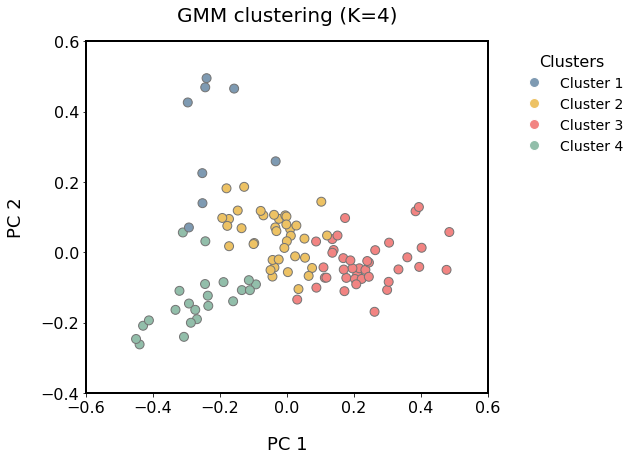

In [13]:
clusters = gmm_pred(i=4, df=training)

In [14]:
AA_list = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa_color_dict = {
    # Hydrophobic
    'A': '#B8B8B8', 'V': '#B8B8B8', 'L': '#B8B8B8',
    'I': '#B8B8B8', 'M': '#B8B8B8', 'P': '#B8B8B8', 'G': '#B8B8B8',

    # Polar uncharged
    'S': '#92BEAA', 'T': '#92BEAA', 'N': '#92BEAA',
    'Q': '#92BEAA', 'C': '#92BEAA',

    # Positively charged
    'K': '#7E9AB2', 'R': '#7E9AB2', 'H': '#7E9AB2',

    # Negatively charged
    'D': '#F28482', 'E': '#F28482',

    # Aromatic
    'F': '#EDC264', 'W': '#EDC264', 'Y': '#EDC264'
}
def seqlogo_cluster_aligned(df, HLA, cluster_id):
    cent_df = df[df["allele"] == HLA]
    lengths = [8, 9, 10, 11]
    
    max_length = cent_df["len"].max()*1.2
    available_lengths = sorted(cent_df["len"].unique())
    nrows = len(available_lengths)

    fig, axes = plt.subplots(nrows=nrows, figsize=(5, 2 * nrows), 
                             facecolor='none', constrained_layout=False)

    if nrows == 1:
        axes = [axes]

    idx = 0
    for idx, i in enumerate(lengths):
        if i not in available_lengths:
            continue
        
        peplist = cent_df[cent_df["len"] == i]["peptide"]
        split_pep = peplist.str.split("", expand=True).drop([0, i + 1], axis=1)
        split_pep.columns = range(i)

        pos_AA_p = pd.DataFrame(columns=AA_list)
        for y in range(i):
            AA_p = []
            entropy_lst = []
            for aa in AA_list:
                p = split_pep[y].tolist().count(aa) / len(peplist)
                AA_p.append(p)
                if p != 0:
                    entropy_lst.append(p * math.log(p, 2))
            R_ = math.log(20, 2) - (-1 * sum(entropy_lst) + (1 / math.log(2) * (20 - 1) / (2 * len(peplist))))
            pos_AA_p.loc[len(pos_AA_p)] = [item * R_ for item in AA_p]

        logomaker.Logo(pos_AA_p, ax=axes[idx], color_scheme=aa_color_dict)

        axes[idx].set_facecolor('none')
        axes[idx].tick_params(axis='both', which='both', labelsize=14)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

        axes[idx].set_xticks([])
        shrink_factor = 0.7
        overlap_factor = 1.3   # 1.2 ~ tight, 1.4 ~ loose
        box = axes[idx].get_position()

        scale = i / max_length
        new_width = box.width * scale
        dy = box.height * shrink_factor * overlap_factor
        y_start = 0.9  

        new_y = y_start - idx * dy

        axes[idx].set_position([
            box.x0,
            new_y,
            new_width,
            box.height * shrink_factor
        ])
        idx += 1

    fig.text(-0.04, 0.73, f"Cluster {cluster_id} centroid", fontsize=20, fontweight='regular', rotation=90, va='center')
    
    fig.suptitle(HLA, fontsize=20, fontweight='regular', x=0.12, y=1.08, ha='left')
    filename = f"figures/cluster{cluster_id}_centroid.png"
    plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
    filename = f"figures/pdf/cluster{cluster_id}_centroid.pdf"
    plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

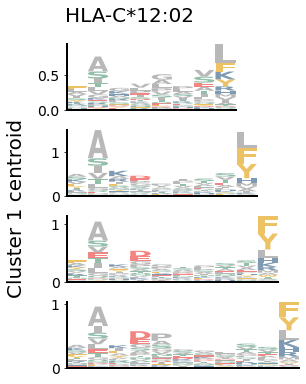

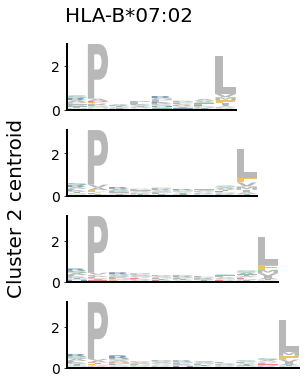

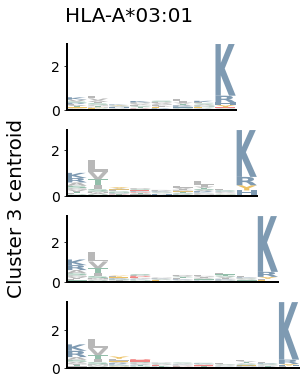

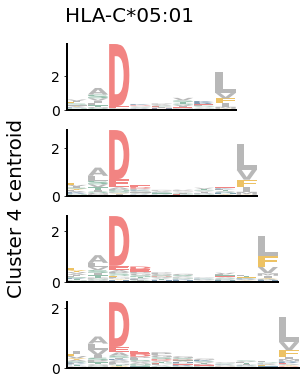

In [21]:
seqlogo_cluster_aligned(mhc_df_filtered, "HLA-C*12:02", cluster_id=1)
seqlogo_cluster_aligned(mhc_df_filtered, "HLA-B*07:02", cluster_id=2)
seqlogo_cluster_aligned(mhc_df_filtered, "HLA-A*03:01",3)
seqlogo_cluster_aligned(mhc_df_filtered, "HLA-C*05:01",4)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
train_resetindex = training.reset_index(drop=True)
final_df_c4.reset_index(drop=True, inplace=True)

merged_df123 = train_resetindex.join(final_df_c4)
merged_df123.index = training.index

merged_df123.drop(columns = ["HLA"], inplace = True)
merged_df123

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,cluster
HLA-A*01:01,0.081315,0.162422,0.241059,0.035835,0.034292,0.050126,0.070092,0.324860,0.034812,0.179176,...,0.221327,0.028810,0.027451,0.029126,0.023306,0.023021,0.029119,0.034830,0.368131,3
HLA-A*02:01,0.071104,0.307429,0.074598,0.086387,0.097113,0.078272,0.066282,0.218815,0.063017,0.316960,...,0.066635,0.115659,0.042984,0.048289,0.044050,0.044625,0.046068,0.040506,0.204624,1
HLA-A*02:02,0.168891,0.126514,0.100034,0.100743,0.067922,0.094194,0.063096,0.278605,0.054757,0.316398,...,0.093193,0.117159,0.030839,0.036117,0.042976,0.039837,0.027649,0.041866,0.216500,0
HLA-A*02:03,0.083138,0.201355,0.093360,0.068630,0.204836,0.071905,0.039563,0.237213,0.060854,0.289886,...,0.081340,0.110051,0.047964,0.030990,0.034878,0.073039,0.025032,0.051098,0.246501,0
HLA-A*02:04,0.063085,0.221893,0.120331,0.060300,0.146161,0.091679,0.055805,0.240747,0.060805,0.232372,...,0.102723,0.096211,0.032344,0.051654,0.031558,0.084505,0.063438,0.036452,0.217723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HLA-C*14:02,0.080107,0.343461,0.053702,0.045214,0.114524,0.039027,0.065993,0.257971,0.068029,0.354785,...,0.087094,0.090138,0.065766,0.030765,0.037644,0.053018,0.050317,0.053606,0.176029,1
HLA-C*14:03,0.093926,0.324020,0.055399,0.074286,0.132611,0.033844,0.072139,0.213774,0.074042,0.350829,...,0.088261,0.101596,0.062464,0.021371,0.031482,0.040927,0.056179,0.049893,0.164539,1
HLA-C*15:02,0.058991,0.143934,0.141061,0.058572,0.119255,0.191503,0.049054,0.237629,0.092705,0.191240,...,0.064102,0.092033,0.045810,0.049605,0.023875,0.034028,0.048474,0.074392,0.267488,0
HLA-C*16:01,0.090457,0.258861,0.063814,0.052830,0.130448,0.060502,0.090346,0.252741,0.084620,0.282253,...,0.062260,0.085823,0.055813,0.042407,0.039597,0.060107,0.052649,0.064104,0.286654,0


/home/shepherd/anaconda3/envs/xgboost_env2/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


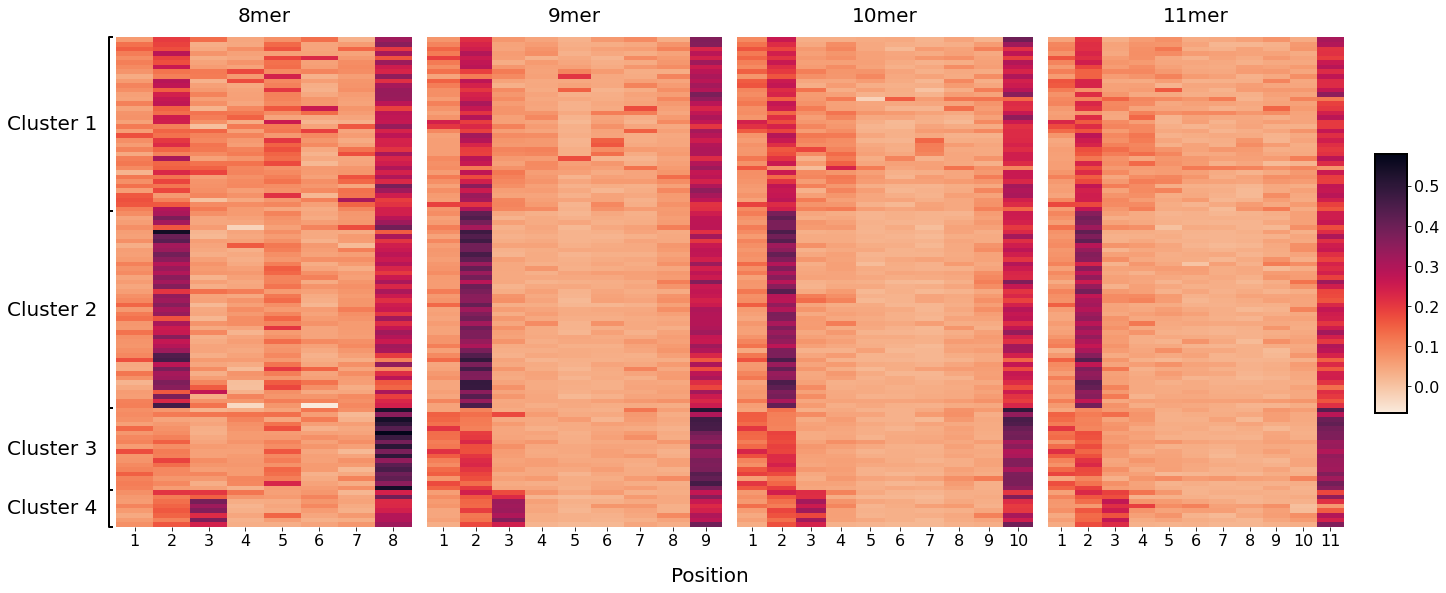

In [17]:
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.weight'] = 400
plt.rcParams['axes.labelweight'] = 400

sorted_df = merged_df123.sort_values(by=["cluster"])
group_names = ['8mer', '9mer', '10mer', '11mer']

cluster_starts_ends = sorted_df['cluster'].diff().ne(0).cumsum()
cluster_positions = cluster_starts_ends.value_counts().sort_index()



groups = [
    (0, 7),    # 8mer columns
    (8, 16),   # 9mer columns
    (17, 26),  # 10mer columns
    (27, 37)   # 11mer columns
]

# Calculate vmin and vmax based on the data
vmin = sorted_df.iloc[:, [col for start, end in groups for col in range(start, end+1)]].min().min()
vmax = sorted_df.iloc[:, [col for start, end in groups for col in range(start, end+1)]].max().max()

subplot_width = 5
subplot_height = 9
custom_palette = ["#F1EEE9", "#BDC3C7", "#7E9AB2"]  # dark → medium → light
custom_cmap = LinearSegmentedColormap.from_list("custom_grad", custom_palette)
custom_cmap = sns.color_palette("rocket_r", as_cmap=True)



fig, axs = plt.subplots(1, len(groups), figsize=(subplot_width * len(groups) + 2, subplot_height), sharey=True, gridspec_kw={'wspace': 0.05, 'width_ratios': [1] * len(groups)})

for i, (start, end) in enumerate(groups):
    sns.heatmap(sorted_df.iloc[:, start:end+1], ax=axs[i], cmap=custom_cmap, yticklabels=False, cbar=False, vmin=vmin, vmax=vmax)
    axs[i].set_title(group_names[i], fontsize=20, y=1.02)  
    axs[i].set_xticks(np.arange(end - start + 1) + 0.5)
    axs[i].set_xticklabels(range(1, end - start + 2), fontsize=16)  
    axs[i].set_aspect(aspect='auto')

cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=16)  

axs[0].set_ylabel('')
fig.text(0.5, 0.04, 'Position', ha='center', fontsize=20, fontweight='regular')

start_pos = 0
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
for idx, cluster_size in enumerate(cluster_positions):
    end_pos = start_pos + cluster_size
    axs[0].plot([-0.1, -0.2, -0.2, -0.1], [start_pos, start_pos, end_pos, end_pos], clip_on=False, color="black", lw=2)  # Increased line width
    axs[0].annotate(cluster_labels[idx], xy=(-0.5, (start_pos + end_pos) / 2), xycoords='data',
                    ha='right', va='center', fontsize=20, fontweight='regular', annotation_clip=False)
    start_pos = end_pos  

plt.tight_layout(rect=[0, 0, 0.9, 1])
filename = "figures/HLA_heatmap.png"
plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
filename = "figures/pdf/HLA_heatmap.pdf"
plt.savefig(filename, dpi=300, transparent=True, bbox_inches='tight')
plt.show()

[Pos 3] 8-mer: Cluster 4 vs others → U=786.000, p=3.9608e-06
[Pos 3] 9-mer: Cluster 4 vs others → U=791.000, p=2.9734e-06
[Pos 3] 10-mer: Cluster 4 vs others → U=791.000, p=2.9734e-06
[Pos 3] 11-mer: Cluster 4 vs others → U=792.000, p=2.8065e-06


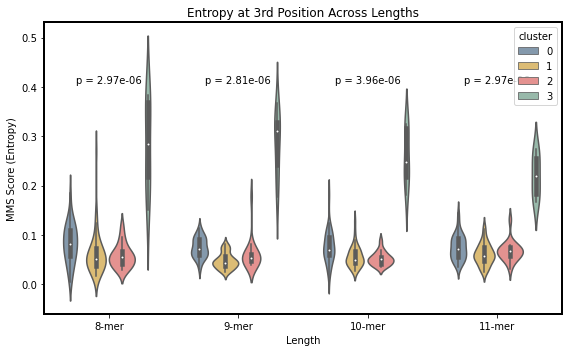

In [18]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu

cluster_palette = {
    0: '#7E9AB2',  # Cluster 1
    1: '#EDC264',  # Cluster 2
    2: '#F28482',  # Cluster 3
    3: '#92BEAA'   # Cluster 4
}

training_entropy = training.copy()
training_entropy['HLA'] = training_entropy.index
training_entropy = training_entropy.merge(final_df_c4, on="HLA", how="inner")

pos_3_indices = {"8-mer": "2", "9-mer": "10", "10-mer": "19", "11-mer": "29"}
entropy_pos3 = training_entropy.melt(
    id_vars=["HLA", "cluster"],
    value_vars=list(pos_3_indices.values()),
    var_name="ColIndex",
    value_name="MMS"
)
entropy_pos3["Length"] = entropy_pos3["ColIndex"].map({v: k for k, v in pos_3_indices.items()})

pvals_3 = {}
for length in entropy_pos3["Length"].unique():
    subset = entropy_pos3[entropy_pos3["Length"] == length]
    group4 = subset[subset["cluster"] == 3]["MMS"] + 1
    others = subset[subset["cluster"] != 3]["MMS"] + 1

    if len(group4) > 0 and len(others) > 0:
        stat, pval = mannwhitneyu(group4, others, alternative="two-sided")
        pvals_3[length] = pval
        print(f"[Pos 3] {length}: Cluster 4 vs others → U={stat:.3f}, p={pval:.4e}")
    else:
        pvals_3[length] = None

plt.figure(figsize=(8, 5))
sns.violinplot(data=entropy_pos3, x="Length", y="MMS", hue="cluster", palette=cluster_palette, dodge=True)
plt.title("Entropy at 3rd Position Across Lengths")
plt.ylabel("MMS Score (Entropy)")
y_max = entropy_pos3["MMS"].max()
offset = 0.02
for i, length in enumerate(sorted(pvals_3.keys())):
    pval = pvals_3[length]
    if pval is not None:
        text = f"p = {pval:.2e}" if pval < 0.01 else f"p = {pval:.3f}"
        plt.text(i, y_max + offset, text, ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

export_df = entropy_pos3[["HLA", "cluster", "Length", "MMS"]].copy()

export_df["Cluster_Label"] = export_df["cluster"] + 1 
export_df = export_df.drop(columns="cluster")
export_df = export_df.rename(columns={
    "Cluster_Label": "Cluster",
    "MMS": "Entropy_Position3"
})

# Save to CSV
export_df.to_csv("../results/entropy_pos3_by_cluster.csv", index=False)

In [19]:
import pandas as pd
import seaborn as sns
from scipy.stats import kruskal

merged_positions = {
    "P1": ["0", "8", "17", "27"],
    "P2": ["1", "9", "18", "28"],
    "P3": ["2", "10", "19", "29"],
    "P4": ["3", "11", "20", "30"]
}

position_records = []

for label, cols in merged_positions.items():
    df_subset = training_entropy[["HLA", "cluster"] + cols].copy()
    df_melted = df_subset.melt(id_vars=["HLA", "cluster"], value_vars=cols, value_name="MMS")
    df_melted["PositionGroup"] = label
    position_records.append(df_melted)

position_df = pd.concat(position_records, ignore_index=True)
position_df["Cluster"] = position_df["cluster"] + 1  # Cluster 1–4

pvals = {}
for pos in position_df["PositionGroup"].unique():
    subset = position_df[position_df["PositionGroup"] == pos]
    grouped = subset.groupby("Cluster")["MMS"].apply(list)
    
    if len(grouped) > 1:
        stat, pval = kruskal(*grouped)
        pvals[pos] = pval
        print(f"{pos}: H={stat:.3f}, p={pval:.4e}")
    else:
        pvals[pos] = None

export_df = position_df[["HLA", "Cluster", "PositionGroup", "MMS"]].copy()

export_df = export_df.rename(columns={
    "MMS": "EntropyScore",
    "PositionGroup": "Position"
})

export_df.to_csv("../results/MMS_entropy_by_position_and_cluster.csv", index=False)

P1: H=78.038, p=8.0868e-17
P2: H=300.771, p=6.7736e-65
P3: H=137.149, p=1.5566e-29
P4: H=111.056, p=6.5015e-24


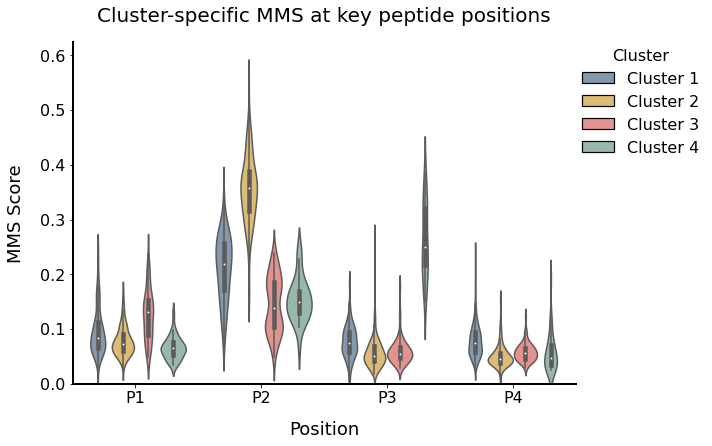

In [20]:
# === Set global plotting style ===
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.labelweight"] = 'regular'
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["legend.fontsize"] = 16
plt.rcParams['pdf.fonttype'] = 42

LABEL_COLOR_MAP = {
    1: '#7E9AB2',  # Cluster 1
    2: '#EDC264',  # Cluster 2
    3: '#F28482',  # Cluster 3
    4: '#92BEAA',  # Cluster 4
    5: '#7F7F7F',  # optional
    6: '#FFDD00',
    7: '#475246',
    8: '#AAAAAA'
}

palette = [LABEL_COLOR_MAP[i] for i in sorted(LABEL_COLOR_MAP.keys()) if i in [1,2,3,4]]
df = pd.read_csv("../results/MMS_entropy_by_position_and_cluster.csv")

plt.figure(figsize=(10, 6.3))
ax = sns.violinplot(
    data=df,
    x="Position",
    y="EntropyScore",
    hue="Cluster",
    palette=palette,
    dodge=True,
    linewidth=1.5,
    edgecolor='black'
)
plt.ylim(bottom=0)
ax.set_xlabel("Position", labelpad=15)
ax.set_ylabel("MMS Score", labelpad=15)
ax.tick_params(axis='x', labelsize=16)  
ax.tick_params(axis='y', labelsize=16) 
ax.set_title("Cluster-specific MMS at key peptide positions", pad=20)
ax.set_facecolor('none')
sns.despine(ax=ax, top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
new_labels = [f"Cluster {lbl}" for lbl in labels]  
leg = ax.legend(handles, new_labels, title="Cluster", title_fontsize=16,
                bbox_to_anchor=(1, 1), loc='upper left',
                frameon=False, borderaxespad=0.)
leg.get_frame().set_facecolor('none')  
leg.get_frame().set_edgecolor('none')  

for handle in leg.legendHandles:
    handle.set_edgecolor('black')
    handle.set_linewidth(1.2)
    
plt.tight_layout()
plt.savefig("figures/MMS_position_violin_custom.png", dpi=300, transparent=True, bbox_inches='tight')
plt.savefig("figures/pdf/MMS_position_violin_custom.pdf", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import logomaker

AA_list = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa_color_dict = {
    'A': '#B8B8B8', 'V': '#B8B8B8', 'L': '#B8B8B8',
    'I': '#B8B8B8', 'M': '#B8B8B8', 'P': '#B8B8B8', 'G': '#B8B8B8',
    'S': '#92BEAA', 'T': '#92BEAA', 'N': '#92BEAA', 'Q': '#92BEAA', 'C': '#92BEAA',
    'K': '#7E9AB2', 'R': '#7E9AB2', 'H': '#7E9AB2',
    'D': '#F28482', 'E': '#F28482',
    'F': '#EDC264', 'W': '#EDC264', 'Y': '#EDC264'
}

def seqlogo_by_hla(df, HLA):
    cent_df = df[df["allele"] == HLA]
    lengths = sorted(cent_df["len"].unique())

    for i in lengths:
        peplist = cent_df[cent_df["len"] == i]["peptide"]
        split_pep = peplist.str.split("", expand=True).drop([0, i + 1], axis=1)
        split_pep.columns = range(i)

        pos_AA_p = pd.DataFrame(columns=AA_list)
        for y in range(i):
            AA_p = []
            entropy_lst = []
            for aa in AA_list:
                p = split_pep[y].tolist().count(aa) / len(peplist)
                AA_p.append(p)
                if p != 0:
                    entropy_lst.append(p * math.log(p, 2))
            R_ = math.log(20, 2) - (-1 * sum(entropy_lst) + (1 / math.log(2) * (20 - 1) / (2 * len(peplist))))
            pos_AA_p.loc[len(pos_AA_p)] = [item * R_ for item in AA_p]

        # Create individual figure
        fig, ax = plt.subplots(figsize=(i * 0.6, 2), facecolor='none')
        logomaker.Logo(pos_AA_p, ax=ax, color_scheme=aa_color_dict)

        ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

        # Save PNG and PDF
        base_filename = f"{HLA}_len{i}"
        plt.savefig(f"figures/{base_filename}.png", dpi=300, transparent=True, bbox_inches='tight')
        plt.savefig(f"figures/pdf/{base_filename}.pdf", dpi=300, transparent=True, bbox_inches='tight')
        plt.show()
        plt.close()

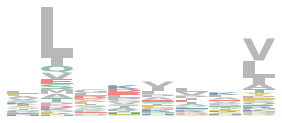

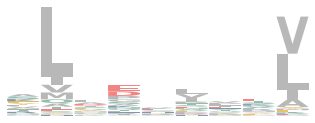

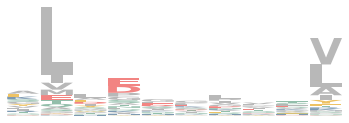

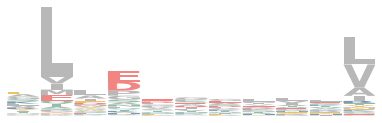

In [29]:
seqlogo_by_hla(mhc_df_filtered, "HLA-A*02:01")

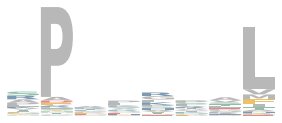

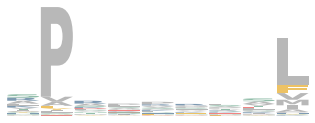

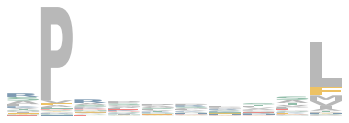

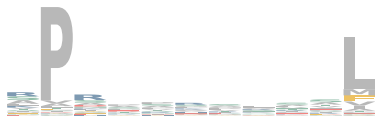

In [30]:
seqlogo_by_hla(mhc_df_filtered, "HLA-B*07:02")

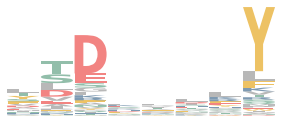

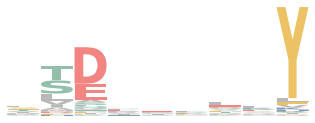

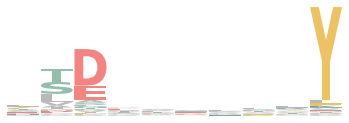

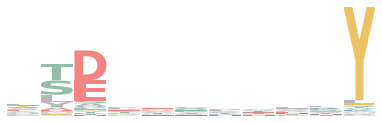

In [34]:
seqlogo_by_hla(mhc_df_filtered, "HLA-A*01:01")